The following lines of code calculates the Standard Modell's 1st and 2nd order beta functions, and performs calculations with it.

I programmed the RGE equations based on Wolfram Mathematica's SARAH package.

In [1]:
# Basic packages
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from scipy.integrate import solve_ivp

0.) Constants 

In [2]:
# Constants that we use throughout the code
alpha_EM = 1 / 127.937  # EM coupling constant
alpha_S = 0.1184   # S coupling constant
sin2_theta = 0.23126  # Weak angle 
cos2_theta = 1 - sin2_theta
sin_theta = np.sqrt(sin2_theta)
cos_theta = np.sqrt(cos2_theta)
M_t = 173.1 # GeV   top-kvark mass
M_h = 125.5 # GeV   higgs-boson mass
M_Z = 91.1876  # GeV mass of Z-boson


# Errors in constants
delta_alpha_EN = 1 / 0.015
delta_alpha_S = 0.0007
delta_sin2_theta = 0.00005
delta_cos2_theta = 1 - delta_sin2_theta
delta_sin_theta = np.sqrt(delta_sin2_theta)
delta_cos_theta = np.sqrt(delta_cos2_theta)
delta_M_t = 0.7   # GeV
delta_M_h = 0.5 # GeV

1.) Initial conditions to solve the differential equations. These initial conditions can be found in the following [link](https://arxiv.org/abs/1205.6497).

In [3]:
# Initial conditions
# Gauge terms
g1_initial = np.sqrt(5/3)*np.sqrt(4*np.pi*alpha_EM) / cos_theta # 0.461
g2_initial =  np.sqrt(4*np.pi*alpha_EM) / sin_theta #  0.652
g3_initial = 1.1645 + 0.0031*((alpha_S - 0.1184)/0.0007) - 0.00046*(M_t - 173.15) # 1.165

# Top-yukawa term
y_t_initial = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S - 0.1184)/0.0007) # 0.936
delta_y_t_intial = 0.00200

# Scalar term
lambda_initial =  1*( 0.12577 + 0.00205*(M_h - 125) - 0.00004*(M_t - 173.15) )  # 0.126
delta_lambda_initial = 0.00140

# yb, ytau Yukawa terms from the definition of mass
y_tau_initial = 0.0102  # 0.01
y_b_initial = 0.016 # 0.0241

# Pack initial conds
y0 = [g1_initial, g2_initial, g3_initial, y_t_initial, y_b_initial, y_tau_initial, lambda_initial]
y1 = [g1_initial, g2_initial, g3_initial, y_t_initial, lambda_initial] # without yb ytau

2.) Defining the functions of 1st and 2nd order beta functions using only t-kvark Yukawa term and using other Yukawa terms as well.

2.1) Beta functions with only t-kvark yukawa term $y_t$ 

In [4]:
# One and two loop versions of beta functions with only t-kvark yukawa term

# 1-loop
def beta2(t, y):
    g1, g2, g3, yt, la = y
    
    # 1 and 2 loop Gauge couplings
    beta_g1_1 = 41/10 * g1**3
    beta_g1_2 = (199 * g1**5 + 5 * g1**3 * (27 * g2**2 + 88 * g3**2 - 17 * yt**2)) / 50
    
    beta_g2_1 = -19/6 * g2**3
    beta_g2_2 = (g2**3 * (27 * g1**2 + 5 * (35 * g2**2 + 72 * g3**2 - 9 * yt**2))) / 30
    
    beta_g3_1 = -7 * g3**3
    beta_g3_2 = (g3**3 * (11 * g1**2 + 45 * g2**2 - 20 * (13 * g3**2 + yt**2))) / 10
    
    # 1 and 2 loop Yukawa couplings
    beta_yt_1 = (3 * yt**3) / 2 - (yt * (17 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yt**2)) / 20
    beta_yt_2 = (yt * (2374 * g1**4 + 5 * g1**2 * (-108 * g2**2 + 304 * g3**2 + 1179 * yt**2)
                 - 75 * (92 * g2**4 - 3 * g2**2 * (48 * g3**2 + 75 * yt**2)
                         + 4 * (432 * g3**4 - 24 * la**2 + 48 * yt**2 * (la + yt**2)
                                - 16 * g3**2 * (9 * yt**2) + 9 * yt**4)))) / 1200
    
    # 1 and 2 loop scalar couplings
    beta_lam_1 = (
        (27 * g1**4) / 200
        + (9 * g1**2 * g2**2) / 20
        + (9 * g2**4) / 8
        - (9 * g1**2 * la) / 5
        - 9 * g2**2 * la
        + 24 * la**2
        + 12 * la * yt**2
        - 6 * yt**4
    )
    
    beta_lam_2 = (
        (-3411 * g1**6) / 2000
        + (305 * g2**6) / 16
        - 312 * la**3
        + 80 * g3**2 * la * yt**2
        - 144 * la**2 * yt**2
        - 32 * g3**2 * yt**4
        - 3 * la * yt**4
        + 30 * yt**6
        - (
            3 * g1**4 * (559 * g2**2 - 1258 * la + 228 * yt**2)
        ) / 400
        + (
            3 * g2**2 * la * (72 * la + 5 * (3 * yt**2))
        ) / 2
        - (
            g2**4 * (73 * la + 6 * (3 * yt**2))
        ) / 8
        + (
            g1**2 * (
                -289 * g2**4
                + 12 * g2**2 * (39 * la + 42 * yt**2)
                + 8 * (
                    216 * la**2
                    + 5 * la * (17 * yt**2)
                    + 8 * (-2 * yt**4)
                )
            )
        ) / 80
    )
    
    # Differential equations
    dg1_dt = beta_g1_1 / (4*np.pi)**2 #+ beta_g1_2 / (4*np.pi)**4
    dg2_dt = beta_g2_1 / (4*np.pi)**2 #+ beta_g2_2 / (4*np.pi)**4
    dg3_dt = beta_g3_1 / (4*np.pi)**2 #+ beta_g3_2 / (4*np.pi)**4
    dyt_dt = beta_yt_1 / (4*np.pi)**2 #+ beta_yt_2 / (4*np.pi)**4
    dlam_dt = beta_lam_1 / (4*np.pi)**2 #+ beta_lam_2 / (4*np.pi)**4
    
    return [dg1_dt, dg2_dt, dg3_dt, dyt_dt, dlam_dt]


# 2-loop
def beta3(t, y):
    g1, g2, g3, yt, la = y
    
    # 1 and 2 loop Gauge couplings
    beta_g1_1 = 41/10 * g1**3
    beta_g1_2 = (199 * g1**5 + 5 * g1**3 * (27 * g2**2 + 88 * g3**2 - 17 * yt**2)) / 50
    
    beta_g2_1 = -19/6 * g2**3
    beta_g2_2 = (g2**3 * (27 * g1**2 + 5 * (35 * g2**2 + 72 * g3**2 - 9 * yt**2))) / 30
    
    beta_g3_1 = -7 * g3**3
    beta_g3_2 = (g3**3 * (11 * g1**2 + 45 * g2**2 - 20 * (13 * g3**2 + yt**2))) / 10
    
    # 1 and 2 loop Yukawa couplings
    beta_yt_1 = (3 * yt**3) / 2 - (yt * (17 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yt**2)) / 20
    beta_yt_2 = (yt * (2374 * g1**4 + 5 * g1**2 * (-108 * g2**2 + 304 * g3**2 + 1179 * yt**2)
                 - 75 * (92 * g2**4 - 3 * g2**2 * (48 * g3**2 + 75 * yt**2)
                         + 4 * (432 * g3**4 - 24 * la**2 + 48 * yt**2 * (la + yt**2)
                                - 16 * g3**2 * (9 * yt**2) + 9 * yt**4)))) / 1200
    
    # 1 and 2 loop scalar couplings
    beta_lam_1 = (
        (27 * g1**4) / 200
        + (9 * g1**2 * g2**2) / 20
        + (9 * g2**4) / 8
        - (9 * g1**2 * la) / 5
        - 9 * g2**2 * la
        + 24 * la**2
        + 12 * la * yt**2
        - 6 * yt**4
    )
    
    beta_lam_2 = (
        (-3411 * g1**6) / 2000
        + (305 * g2**6) / 16
        - 312 * la**3
        + 80 * g3**2 * la * yt**2
        - 144 * la**2 * yt**2
        - 32 * g3**2 * yt**4
        - 3 * la * yt**4
        + 30 * yt**6
        - (
            3 * g1**4 * (559 * g2**2 - 1258 * la + 228 * yt**2)
        ) / 400
        + (
            3 * g2**2 * la * (72 * la + 5 * (3 * yt**2))
        ) / 2
        - (
            g2**4 * (73 * la + 6 * (3 * yt**2))
        ) / 8
        + (
            g1**2 * (
                -289 * g2**4
                + 12 * g2**2 * (39 * la + 42 * yt**2)
                + 8 * (
                    216 * la**2
                    + 5 * la * (17 * yt**2)
                    + 8 * (-2 * yt**4)
                )
            )
        ) / 80
    )
    
    # Differential equations
    dg1_dt = beta_g1_1 / (4*np.pi)**2 + beta_g1_2 / (4*np.pi)**4
    dg2_dt = beta_g2_1 / (4*np.pi)**2 + beta_g2_2 / (4*np.pi)**4
    dg3_dt = beta_g3_1 / (4*np.pi)**2 + beta_g3_2 / (4*np.pi)**4
    dyt_dt = beta_yt_1 / (4*np.pi)**2 + beta_yt_2 / (4*np.pi)**4
    dlam_dt = beta_lam_1 / (4*np.pi)**2 + beta_lam_2 / (4*np.pi)**4
    
    return [dg1_dt, dg2_dt, dg3_dt, dyt_dt, dlam_dt]


2.2) Beta functions with other yukawaw terms. ($y_t$, $y_b$, $y_{\tau}$)

In [5]:
# 1- and 2- loop version full beta functions

# 1-loop
# 1-loop version of entire eq's
# Everything: g1 g2 g3 yt ytau yb lam
def beta1_1(t, y):
    g1, g2, g3, yt, yb, ytau, la = y
    
    # 1 and 2 loop Gauge couplings
    beta_g1_1 = 41/10*g1**3
    beta_g1_2 = (199 * g1**5 + 5 * g1**3 * (27 * g2**2 + 88 * g3**2 - 5 * yb**2 - 17 * yt**2 - 15 * ytau**2)) / 50
    
    beta_g2_1 = -19/6*g2**3
    beta_g2_2 = (g2**3 * (27 * g1**2 + 5 * (35 * g2**2 + 72 * g3**2 - 3 * (3 * (yb**2 + yt**2) + ytau**2)))) / 30
    
    beta_g3_1 = -7*g3**3
    beta_g3_2 = (g3**3 * (11 * g1**2 + 45 * g2**2 - 20 * (13 * g3**2 + yb**2 + yt**2))) / 10
    
    # 1 and 2 loop Yukawa couplings
    beta_yt_1 = (3 * (-yb**2 * yt + yt**3)) / 2 - (yt * (17 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yb**2 - 60 * yt**2 - 20 * ytau**2)) / 20
    beta_yt_2 = (yt * (2374 * g1**4 + 5 * g1**2 * (-108 * g2**2 + 304 * g3**2 + 21 * yb**2 + 1179 * yt**2 + 450 * ytau**2)
                 - 75 * (92 * g2**4 - 3 * g2**2 * (48 * g3**2 + 33 * yb**2 + 75 * yt**2 + 10 * ytau**2)
                         + 4 * (432 * g3**4 - 24 * la**2 + yb**4 + 48 * yt**2 * (la + yt**2)
                                - 16 * g3**2 * (yb**2 + 9 * yt**2) + 9 * yt**2 * ytau**2
                                + 9 * ytau**4 + yb**2 * (11 * yt**2 - 5 * ytau**2))))) / 1200

    
    beta_yb_1 = (3 * (yb**3 - yb * yt**2)) / 2 - (yb * (5 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yb**2 - 60 * yt**2 - 20 * ytau**2)) / 20
    beta_yb_2 = (yb * (-254*g1**4 
                  + 5*g1**2 * (-324*g2**2 + 496*g3**2 + 711*yb**2 + 273*yt**2 + 450*ytau**2)
                  - 75 * (92*g2**4 
                          - 3*g2**2 * (48*g3**2 + 75*yb**2 + 33*yt**2 + 10*ytau**2)
                          + 4 * (432*g3**4 - 24*la**2 + 48*la*yb**2 + 48*yb**4 
                                 + 11*yb**2*yt**2 + yt**4 
                                 - 16*g3**2 * (9*yb**2 + yt**2) 
                                 + (9*yb**2 - 5*yt**2)*ytau**2 
                                 + 9*ytau**4)))) / 1200
    
    beta_ytau_1 = (3 * ytau**3) / 2 - (ytau * (45*g1**2 + 45*g2**2 - 60*yb**2 - 60*yt**2 - 20*ytau**2)) / 20
    beta_ytau_2 = (
        ytau * (
            2742*g1**4
            + 5*g1**2 * (108*g2**2 + 50*yb**2 + 170*yt**2 + 537*ytau**2)
            + 25 * (
                -92*g2**4
                + 96*la**2
                + 15*g2**2 * (6*(yb**2 + yt**2) + 11*ytau**2)
                + 4 * (
                    80*g3**2 * (yb**2 + yt**2)
                    - 3 * (
                        9*yb**4
                        - 2*yb**2*yt**2
                        + 9*yt**4
                        + (16*la + 9*(yb**2 + yt**2)) * ytau**2
                        + 4*ytau**4
                    )
                )
            )
        )
    ) / 400
    
    # 1 and 2 loop scalar couplings
    beta_lam_1 = (
        (27 * g1**4) / 200
        + (9 * g1**2 * g2**2) / 20
        + (9 * g2**4) / 8
        - (9 * g1**2 * la) / 5
        - 9 * g2**2 * la
        + 24 * la**2
        + 12 * la * yb**2
        - 6 * yb**4
        + 12 * la * yt**2
        - 6 * yt**4
        + 4 * la * ytau**2
        - 2 * ytau**4
    )
    beta_lam_2 = (
        (-3411 * g1**6) / 2000
        + (305 * g2**6) / 16
        - 312 * la**3
        + 80 * g3**2 * la * yb**2
        - 144 * la**2 * yb**2
        - 32 * g3**2 * yb**4
        - 3 * la * yb**4
        + 30 * yb**6
        + 80 * g3**2 * la * yt**2
        - 144 * la**2 * yt**2
        - 42 * la * yb**2 * yt**2
        - 6 * yb**4 * yt**2
        - 32 * g3**2 * yt**4
        - 3 * la * yt**4
        - 6 * yb**2 * yt**4
        + 30 * yt**6
        - 48 * la**2 * ytau**2
        - la * ytau**4
        + 10 * ytau**6
        - (
            3 * g1**4
            * (559 * g2**2 - 1258 * la - 60 * yb**2 + 228 * yt**2 + 300 * ytau**2)
        ) / 400
        + (
            3 * g2**2
            * la
            * (72 * la + 5 * (3 * (yb**2 + yt**2) + ytau**2))
        ) / 2
        - (
            g2**4
            * (73 * la + 6 * (3 * (yb**2 + yt**2) + ytau**2))
        ) / 8
        + (
            g1**2
            * (
                -289 * g2**4
                + 12 * g2**2 * (39 * la + 18 * yb**2 + 42 * yt**2 + 22 * ytau**2)
                + 8
                * (
                    216 * la**2
                    + 5 * la * (5 * yb**2 + 17 * yt**2 + 15 * ytau**2)
                    + 8
                    * (
                        yb**4
                        - 2 * yt**4
                        - 3 * ytau**4
                    )
                )
            )
        ) / 80
    )
    
    # Differential equations
    dg1_dt = beta_g1_1 / (4*np.pi)**2 #+ beta_g1_2 / (4*np.pi)**4
    dg2_dt = beta_g2_1 / (4*np.pi)**2 #+ beta_g2_2 / (4*np.pi)**4
    dg3_dt = beta_g3_1 / (4*np.pi)**2 #+ beta_g3_2 / (4*np.pi)**4
    dyt_dt = beta_yt_1 / (4*np.pi)**2 #+ beta_yt_2 / (4*np.pi)**4
    dyb_dt = beta_yb_1 / (4*np.pi)**2 #+ beta_yb_2 / (4*np.pi)**4
    dytau_dt = beta_ytau_1 / (4*np.pi)**2 #+ beta_ytau_2 / (4*np.pi)**4
    dlam_dt = beta_lam_1 / (4*np.pi)**2 #+ beta_lam_2 / (4*np.pi)**4
    
    return [dg1_dt, dg2_dt, dg3_dt, dyt_dt, dyb_dt, dytau_dt, dlam_dt]

# 2-loop
# Everything: g1 g2 g3 yt ytau yb lam
def beta1(t, y):
    g1, g2, g3, yt, yb, ytau, la = y
    
    # 1 and 2 loop Gauge couplings
    beta_g1_1 = 41/10*g1**3
    beta_g1_2 = (199 * g1**5 + 5 * g1**3 * (27 * g2**2 + 88 * g3**2 - 5 * yb**2 - 17 * yt**2 - 15 * ytau**2)) / 50
    
    beta_g2_1 = -19/6*g2**3
    beta_g2_2 = (g2**3 * (27 * g1**2 + 5 * (35 * g2**2 + 72 * g3**2 - 3 * (3 * (yb**2 + yt**2) + ytau**2)))) / 30
    
    beta_g3_1 = -7*g3**3
    beta_g3_2 = (g3**3 * (11 * g1**2 + 45 * g2**2 - 20 * (13 * g3**2 + yb**2 + yt**2))) / 10
    
    # 1 and 2 loop Yukawa couplings
    beta_yt_1 = (3 * (-yb**2 * yt + yt**3)) / 2 - (yt * (17 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yb**2 - 60 * yt**2 - 20 * ytau**2)) / 20
    beta_yt_2 = (yt * (2374 * g1**4 + 5 * g1**2 * (-108 * g2**2 + 304 * g3**2 + 21 * yb**2 + 1179 * yt**2 + 450 * ytau**2)
                 - 75 * (92 * g2**4 - 3 * g2**2 * (48 * g3**2 + 33 * yb**2 + 75 * yt**2 + 10 * ytau**2)
                         + 4 * (432 * g3**4 - 24 * la**2 + yb**4 + 48 * yt**2 * (la + yt**2)
                                - 16 * g3**2 * (yb**2 + 9 * yt**2) + 9 * yt**2 * ytau**2
                                + 9 * ytau**4 + yb**2 * (11 * yt**2 - 5 * ytau**2))))) / 1200

    
    beta_yb_1 = (3 * (yb**3 - yb * yt**2)) / 2 - (yb * (5 * g1**2 + 45 * g2**2 + 160 * g3**2 - 60 * yb**2 - 60 * yt**2 - 20 * ytau**2)) / 20
    beta_yb_2 = (yb * (-254*g1**4 
                  + 5*g1**2 * (-324*g2**2 + 496*g3**2 + 711*yb**2 + 273*yt**2 + 450*ytau**2)
                  - 75 * (92*g2**4 
                          - 3*g2**2 * (48*g3**2 + 75*yb**2 + 33*yt**2 + 10*ytau**2)
                          + 4 * (432*g3**4 - 24*la**2 + 48*la*yb**2 + 48*yb**4 
                                 + 11*yb**2*yt**2 + yt**4 
                                 - 16*g3**2 * (9*yb**2 + yt**2) 
                                 + (9*yb**2 - 5*yt**2)*ytau**2 
                                 + 9*ytau**4)))) / 1200
    
    beta_ytau_1 = (3 * ytau**3) / 2 - (ytau * (45*g1**2 + 45*g2**2 - 60*yb**2 - 60*yt**2 - 20*ytau**2)) / 20
    beta_ytau_2 = (
        ytau * (
            2742*g1**4
            + 5*g1**2 * (108*g2**2 + 50*yb**2 + 170*yt**2 + 537*ytau**2)
            + 25 * (
                -92*g2**4
                + 96*la**2
                + 15*g2**2 * (6*(yb**2 + yt**2) + 11*ytau**2)
                + 4 * (
                    80*g3**2 * (yb**2 + yt**2)
                    - 3 * (
                        9*yb**4
                        - 2*yb**2*yt**2
                        + 9*yt**4
                        + (16*la + 9*(yb**2 + yt**2)) * ytau**2
                        + 4*ytau**4
                    )
                )
            )
        )
    ) / 400
    
    # 1 and 2 loop scalar couplings
    beta_lam_1 = (
        (27 * g1**4) / 200
        + (9 * g1**2 * g2**2) / 20
        + (9 * g2**4) / 8
        - (9 * g1**2 * la) / 5
        - 9 * g2**2 * la
        + 24 * la**2
        + 12 * la * yb**2
        - 6 * yb**4
        + 12 * la * yt**2
        - 6 * yt**4
        + 4 * la * ytau**2
        - 2 * ytau**4
    )
    beta_lam_2 = (
        (-3411 * g1**6) / 2000
        + (305 * g2**6) / 16
        - 312 * la**3
        + 80 * g3**2 * la * yb**2
        - 144 * la**2 * yb**2
        - 32 * g3**2 * yb**4
        - 3 * la * yb**4
        + 30 * yb**6
        + 80 * g3**2 * la * yt**2
        - 144 * la**2 * yt**2
        - 42 * la * yb**2 * yt**2
        - 6 * yb**4 * yt**2
        - 32 * g3**2 * yt**4
        - 3 * la * yt**4
        - 6 * yb**2 * yt**4
        + 30 * yt**6
        - 48 * la**2 * ytau**2
        - la * ytau**4
        + 10 * ytau**6
        - (
            3 * g1**4
            * (559 * g2**2 - 1258 * la - 60 * yb**2 + 228 * yt**2 + 300 * ytau**2)
        ) / 400
        + (
            3 * g2**2
            * la
            * (72 * la + 5 * (3 * (yb**2 + yt**2) + ytau**2))
        ) / 2
        - (
            g2**4
            * (73 * la + 6 * (3 * (yb**2 + yt**2) + ytau**2))
        ) / 8
        + (
            g1**2
            * (
                -289 * g2**4
                + 12 * g2**2 * (39 * la + 18 * yb**2 + 42 * yt**2 + 22 * ytau**2)
                + 8
                * (
                    216 * la**2
                    + 5 * la * (5 * yb**2 + 17 * yt**2 + 15 * ytau**2)
                    + 8
                    * (
                        yb**4
                        - 2 * yt**4
                        - 3 * ytau**4
                    )
                )
            )
        ) / 80
    )
    
    # Differential equations
    dg1_dt = beta_g1_1 / (4*np.pi)**2 + beta_g1_2 / (4*np.pi)**4
    dg2_dt = beta_g2_1 / (4*np.pi)**2 + beta_g2_2 / (4*np.pi)**4
    dg3_dt = beta_g3_1 / (4*np.pi)**2 + beta_g3_2 / (4*np.pi)**4
    dyt_dt = beta_yt_1 / (4*np.pi)**2 + beta_yt_2 / (4*np.pi)**4
    dyb_dt = beta_yb_1 / (4*np.pi)**2 + beta_yb_2 / (4*np.pi)**4
    dytau_dt = beta_ytau_1 / (4*np.pi)**2 + beta_ytau_2 / (4*np.pi)**4
    dlam_dt = beta_lam_1 / (4*np.pi)**2 + beta_lam_2 / (4*np.pi)**4
    
    return [dg1_dt, dg2_dt, dg3_dt, dyt_dt, dyb_dt, dytau_dt, dlam_dt]

3.) Solve the differential equations

In [6]:
# Solve the equations only with y_t

# Energy scale
mu_min =  M_t / M_Z 
mu_max = 10e20 / M_Z  #max energy in GeV
t_min = np.log(mu_min)
t_max = np.log(mu_max)

# Solve the Differential equations
sol2 = solve_ivp(beta2, [t_min, t_max], y1, dense_output=True, method='RK45') # 1 loop without yb ytau
sol3 = solve_ivp(beta3, [t_min, t_max], y1, dense_output=True, method='RK45') # 2 loop without yb ytau
sol4 = solve_ivp(beta1, [t_min, t_max], y0, dense_output=True, method='RK45') # 1 loop with yb ytau 

# Evaulate the solution
t_vals = np.linspace(t_min, t_max, 1000)  
y_sol2= sol2.sol(t_vals)
y_sol3 = sol3.sol(t_vals)
y_sol4 = sol4.sol(t_vals)
g1_sol_2, g2_sol_2, g3_sol_2, yt_sol_2, lam_sol_2 = y_sol2  # Different couplings, 1 loop
g1_sol_3, g2_sol_3, g3_sol_3, yt_sol_3, lam_sol_3 = y_sol3  # 2 loop
g1_sol_4, g2_sol_4, g3_sol_4, yt_sol_4, yb_sol_4, ytau_sol_4, lam_sol_4 = y_sol4  # 2 loop with yb ytau
mu_vals = np.exp(t_vals) * M_Z # converts t back to energy-scale mu

In [7]:
# 1-loop version of full beta equations

# Solve the system of ODE
# Energy scale
mu_min =  M_t / M_Z 
mu_max = 10e20 / M_Z  #max energy in GeV
t_min = np.log(mu_min)
t_max = np.log(mu_max)

# Solve the Differential equations
sol1_1 = solve_ivp(beta1_1, [t_min, t_max], y0, dense_output=True, method='RK45')

# Evaulate the solution
t_vals = np.linspace(t_min, t_max, 1000)  
y_sol1_1 = sol1_1.sol(t_vals)
g1_sol_1, g2_sol_1, g3_sol_1, yt_sol_1, yb_sol_1, ytau_sol_1, lam_sol_1 = y_sol1_1  # Different couplings
mu_vals = np.exp(t_vals) * M_Z # converts t back to energy-scale mu

In [8]:
# 2-loop version of full beta equations

# Solve the system of ODE
# Energy scale
mu_min =  M_t / M_Z 
mu_max = 10e20 / M_Z  #max energy in GeV
t_min = np.log(mu_min)
t_max = np.log(mu_max)

# Solve the Differential equations
sol1 = solve_ivp(beta1, [t_min, t_max], y0, dense_output=True, method='RK45')

# Evaulate the solution
t_vals = np.linspace(t_min, t_max, 1000)  
y_sol1 = sol1.sol(t_vals)
g1_sol, g2_sol, g3_sol, yt_sol, yb_sol, ytau_sol, lam_sol = y_sol1  # Different couplings
mu_vals = np.exp(t_vals) * M_Z # converts t back to energy-scale mu

4.) Different plots of the equations

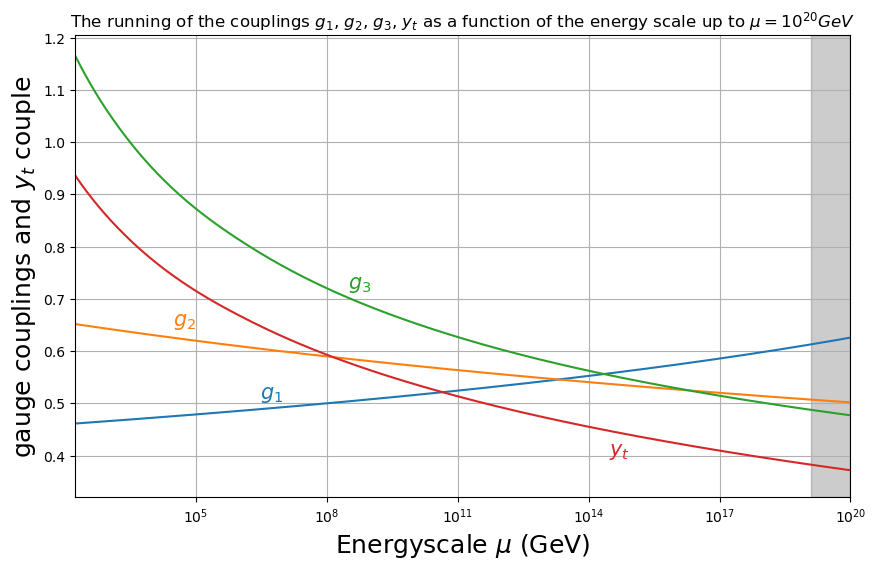

In [9]:
# Plot fo gauge couplings and yt with other Yukawa terms (y_tau, yb)
#  Gauge couplings 
plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol, label=r'$g_3$', color='C2') # g3
plt.plot(mu_vals, yt_sol, label=r'$y_t$',color='C3') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"gauge couplings and $y_t$ couple", fontsize=18)
plt.title(r"The running of the couplings $g_1$, $g_2$, $g_3$, $y_t$ as a function of the energy scale up to $\mu = 10^{20}GeV$ ", fontsize=12)
#plt.legend(loc='best', fontsize='16')


plt.annotate(r'$g_1$', 
             xy=(10e5,0.51), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='C0',
             fontsize=15
             )

plt.annotate(r'$g_2$', 
             xy=(10e3,0.65), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C1',
             fontsize=15
             )

plt.annotate(r'$g_3$', 
             xy=(10e7, 0.72), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C2',
             fontsize=15
             )

plt.annotate(r'$y_t$', 
             xy=(10e13, 0.4), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C3',
             fontsize=15
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()


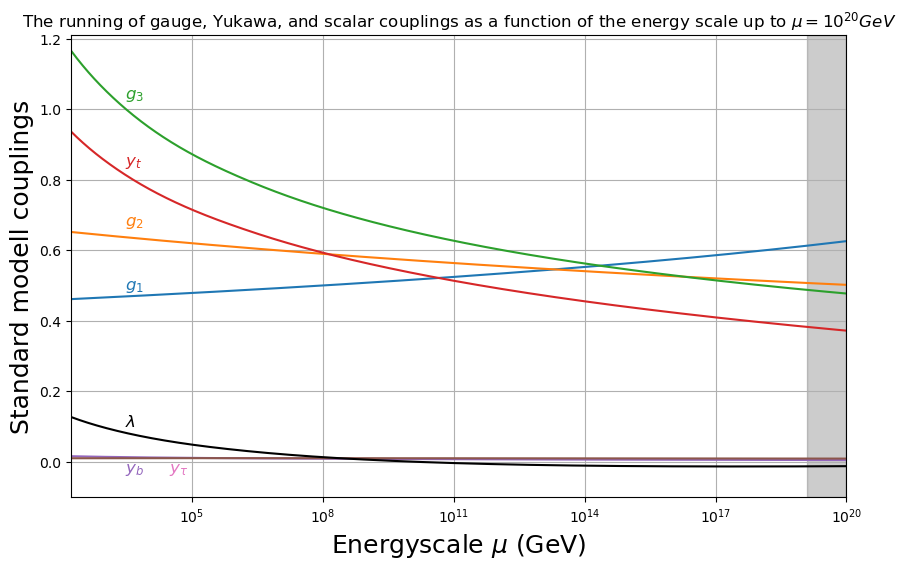

In [10]:
# Plot of every sm couplings with yb and y_tau
#  Gauge couplings 
plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol, label=r'$g_3$', color='C2') # g3
plt.plot(mu_vals, yt_sol, label=r'$y_t$',color='C3') # yt
plt.plot(mu_vals, yb_sol, label=r'$y_b$', color='C4') # yb
plt.plot(mu_vals, ytau_sol, label=r'$y_{\tau}$', color='C5') # ytau
plt.plot(mu_vals, lam_sol, label=r'$\lambda$', color='black') # lambda

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel("Standard modell couplings", fontsize=18)
plt.title(r"The running of gauge, Yukawa, and scalar couplings as a function of the energy scale up to $\mu = 10^{20}GeV$ ", fontsize=12)
#plt.legend(loc='best', fontsize='16')




plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='C0',
             fontsize=12
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C1',
             fontsize=12
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C2',
             fontsize=12
             )

plt.annotate(r'$y_t$', 
             xy=(10e2, 0.84), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C3',
             fontsize=12
             )

plt.annotate(r'$y_b$', 
             xy=(10e2, -0.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C4',
             fontsize=12
             )


plt.annotate(r'$y_{\tau}$', 
             xy=(10e3, -0.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C6',
             fontsize=12
             )

plt.annotate(r'$\lambda$', 
             xy=(10e2, 0.10), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=12
             )



plt.ylim(-0.1, 1.21)
plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()


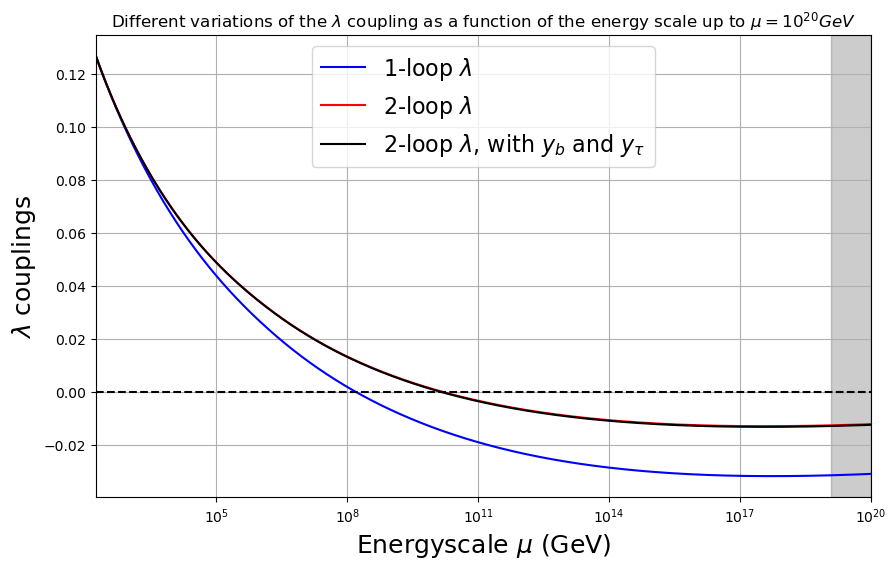

In [11]:
# Plot of different lambda functions

# Lambdas
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_2, label=r'1-loop $\lambda$', color='blue') # 1 loop
plt.plot(mu_vals, lam_sol_3, label=r'2-loop $\lambda$', color='red') # 2 loop
plt.plot(mu_vals, lam_sol_4, label=r'2-loop $\lambda$, with $y_b$ and $y_{\tau}$ ', color='black') # 2 loop with yb ytau

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ couplings", fontsize=18)
plt.title(r"Different variations of the $\lambda$ coupling as a function of the energy scale up to $\mu = 10^{20}GeV$ ", fontsize=12)
plt.legend(loc='best', fontsize='16')



plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()


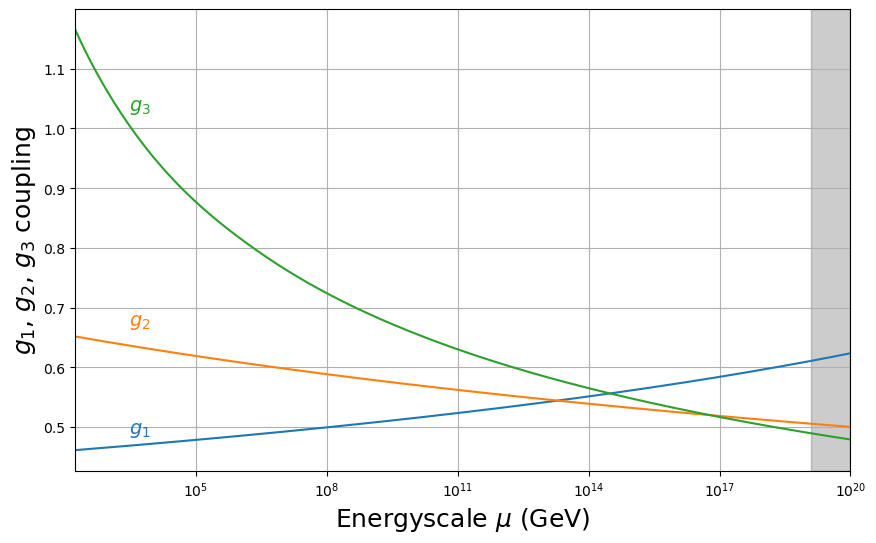

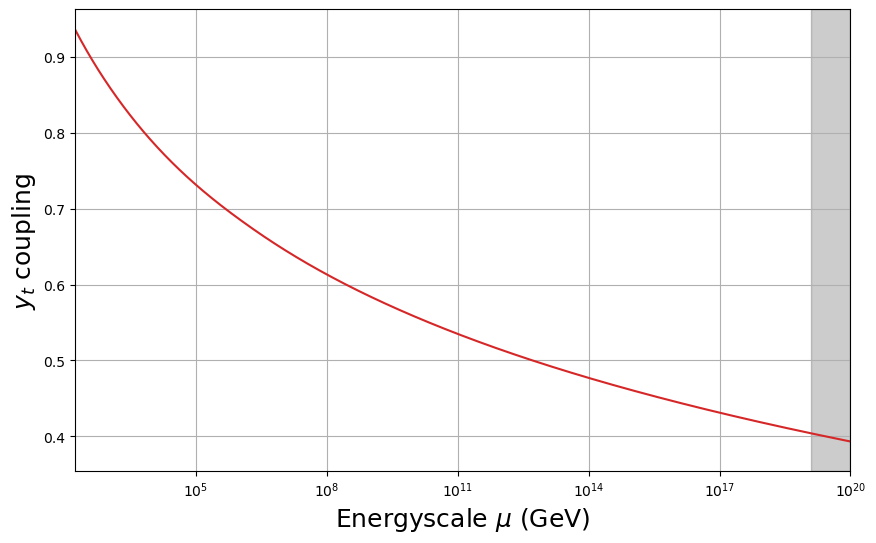

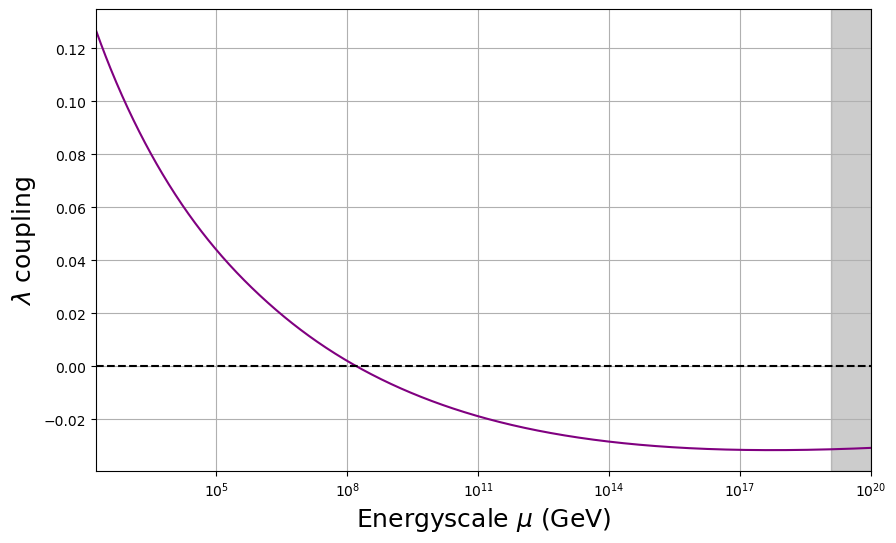

In [12]:
# 1-loop plots with only yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol_2, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol_2, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol_2, label=r'$g_3$', color='C2') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ coupling", fontsize=18)
#plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='C0',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C1',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C2',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 1-loop plots yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol_2, label=r'$g_3$', color='C3') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$y_t$ coupling", fontsize=18)
#plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# egyhurok ábra lambda
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_2, label=r'$g_3$', color='purple') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ coupling", fontsize=18)
#plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

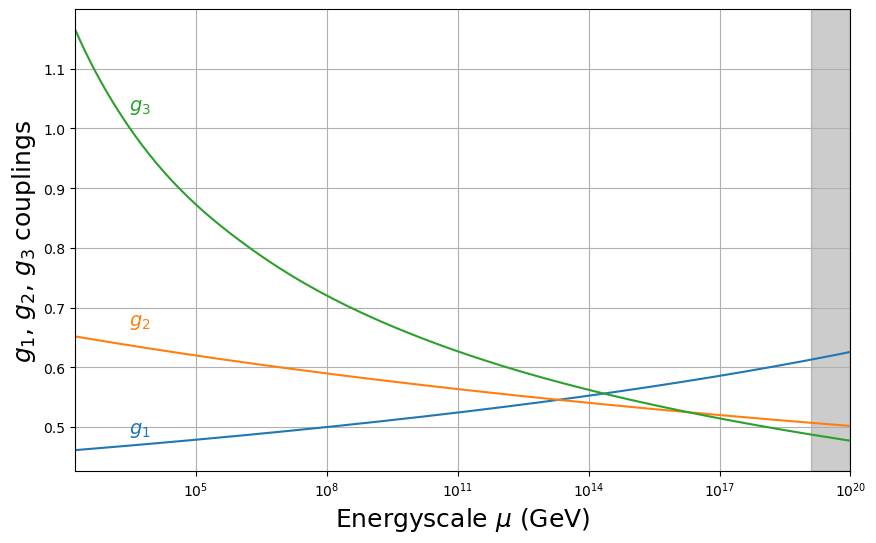

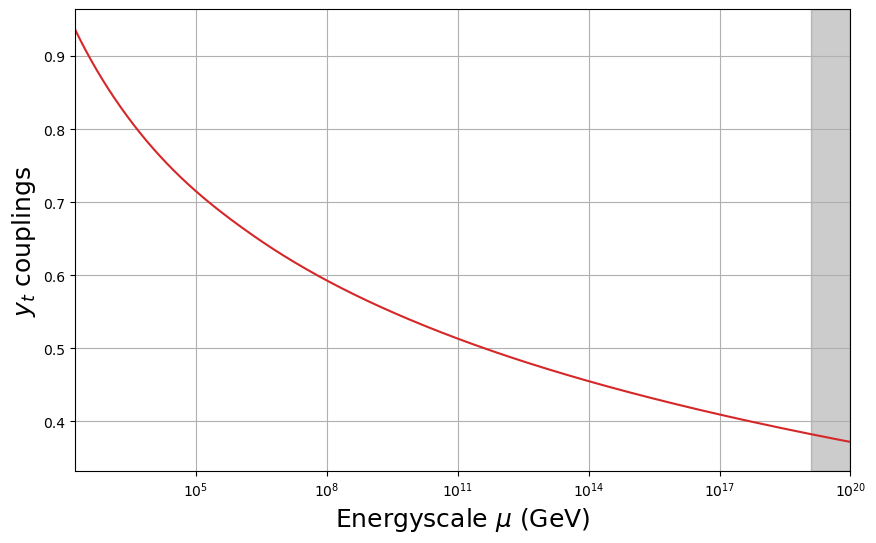

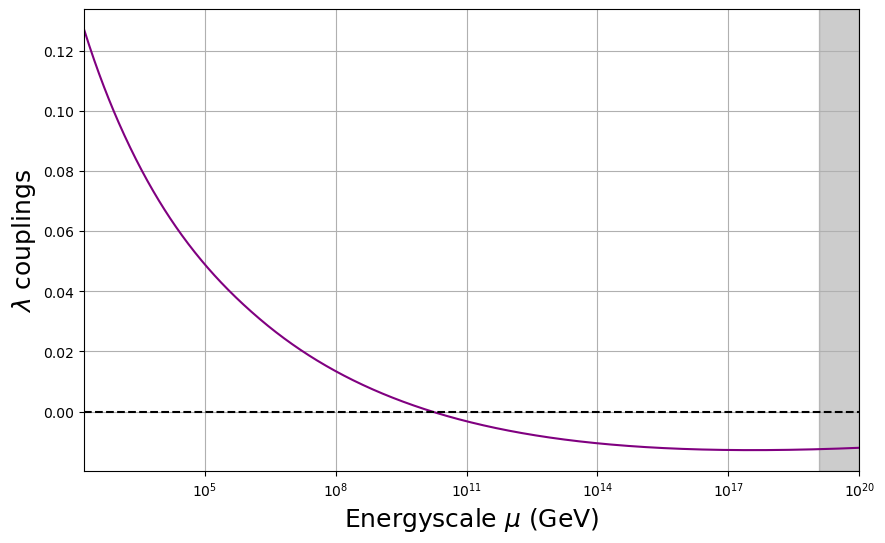

In [13]:
# 2-loop plots of couplings with only yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol_3, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol_3, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol_3, label=r'$g_3$', color='C2') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ couplings", fontsize=18)
#plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='C0',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C1',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='C2',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 2-loop plot yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol_3, label=r'$g_3$', color='C3') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$y_t$ couplings", fontsize=18)
#plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 2-loop plot lambda
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_3, label=r'$g_3$', color='purple') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ couplings", fontsize=18)
#plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

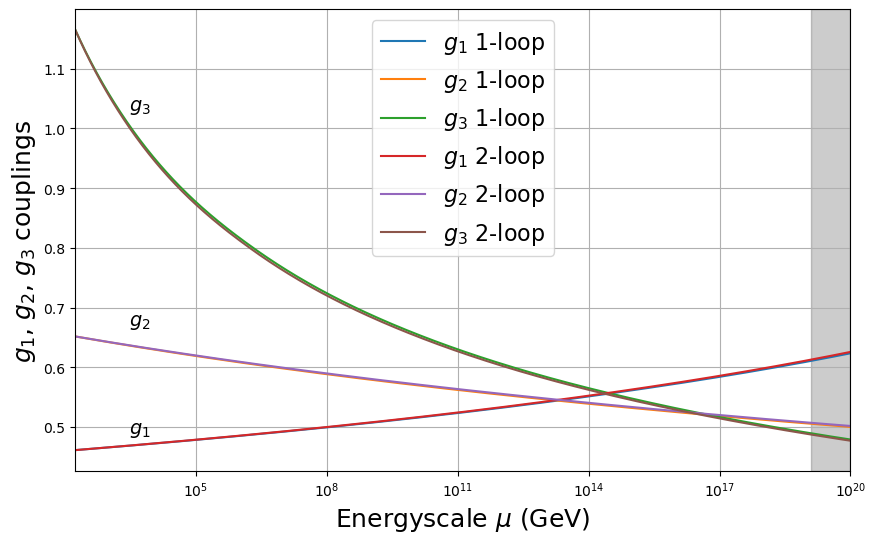

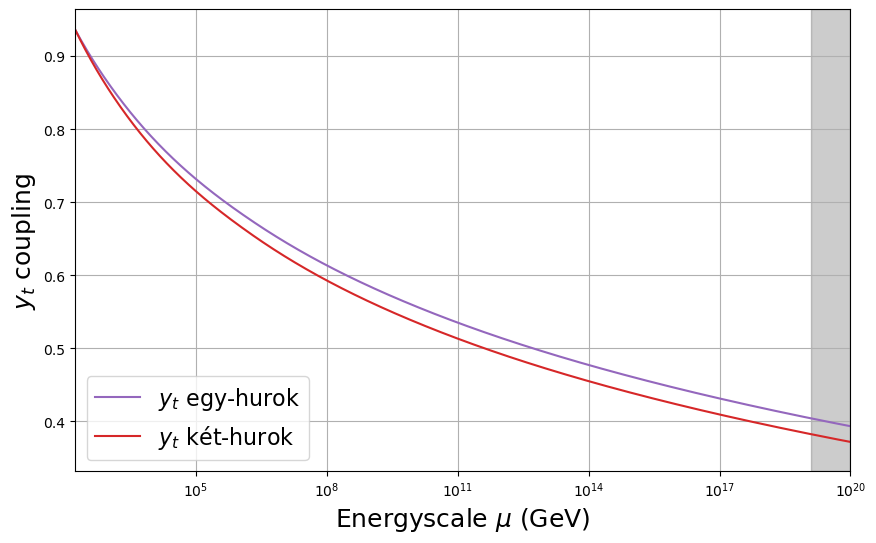

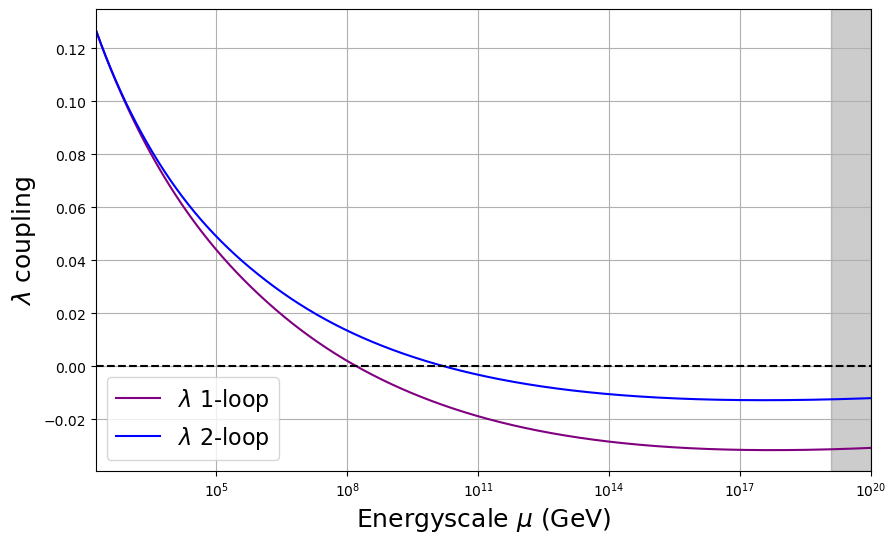

In [14]:
# comparing them
# Kéthurok ábrák g1 g2 g3

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol_2, label=r'$g_1$ 1-loop', color='C0') # g1
plt.plot(mu_vals, g2_sol_2, label=r'$g_2$ 1-loop', color='C1') # g2
plt.plot(mu_vals, g3_sol_2, label=r'$g_3$ 1-loop', color='C2') # g3
plt.plot(mu_vals, g1_sol_3, label=r'$g_1$ 2-loop', color='C3') # g1
plt.plot(mu_vals, g2_sol_3, label=r'$g_2$ 2-loop', color='C4') # g2
plt.plot(mu_vals, g3_sol_3, label=r'$g_3$ 2-loop', color='C5') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# Kéthurok ábrák yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol_2, label=r'$y_t$ egy-hurok', color='C4') # yt
plt.plot(mu_vals, yt_sol_3, label=r'$y_t$ két-hurok', color='C3') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$y_t$ coupling", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# kéthurok ábra lambda

plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_2, label=r'$\lambda$ 1-loop', color='purple') # yt
plt.plot(mu_vals, lam_sol_3, label=r'$\lambda$ 2-loop', color='blue') # yt

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ coupling", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

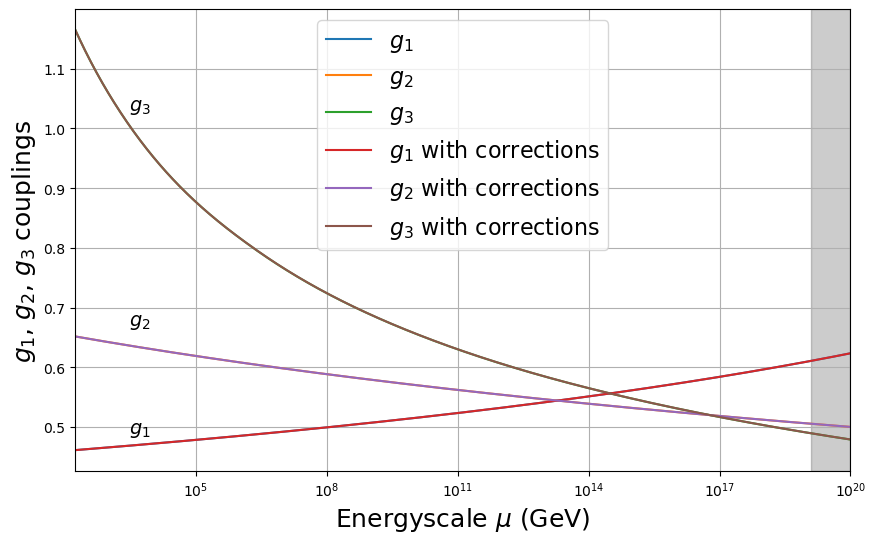

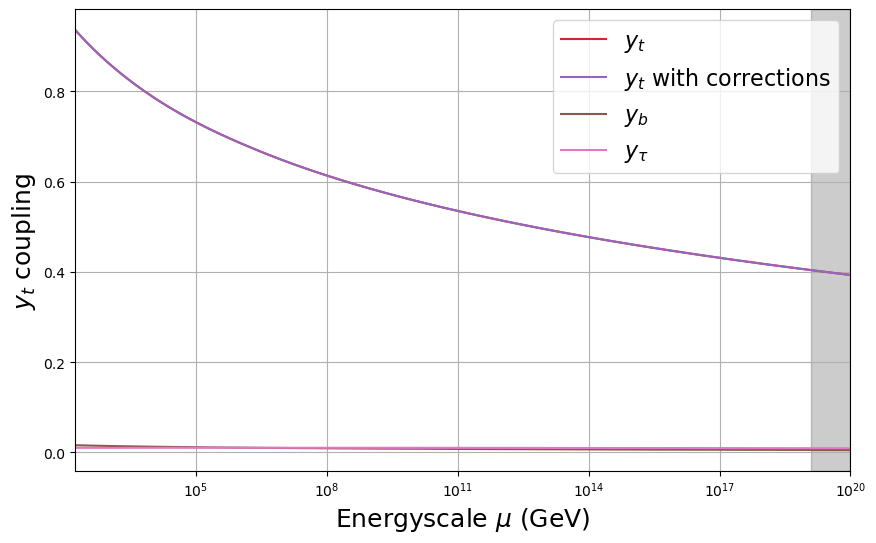

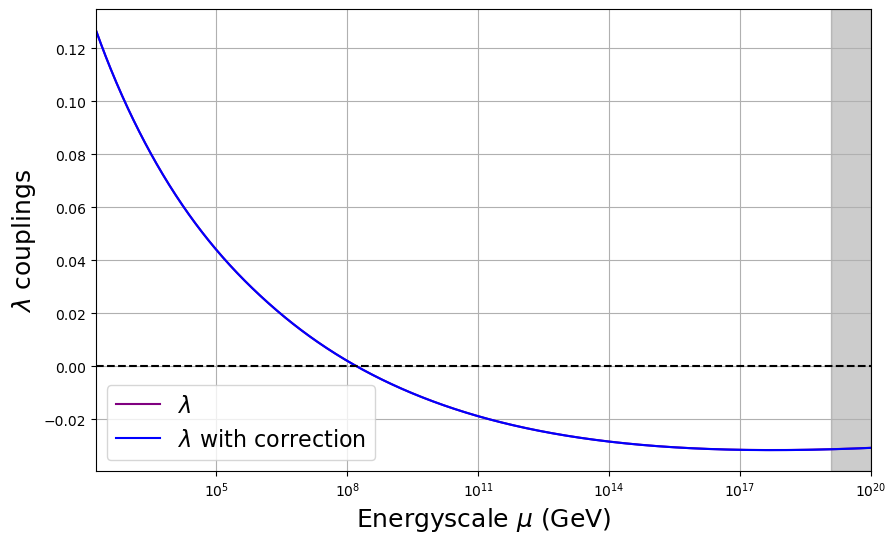

In [15]:
# with and without yb y_tau, comparition
# 1-loop g1 g2 g3

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol_2, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol_2, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol_2, label=r'$g_3$', color='C2') # g3
plt.plot(mu_vals, g1_sol_1, label=r'$g_1$ with corrections', color='C3') # g1
plt.plot(mu_vals, g2_sol_1, label=r'$g_2$ with corrections', color='C4') # g2
plt.plot(mu_vals, g3_sol_1, label=r'$g_3$ with corrections', color='C5') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 1-loop plots yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol_2, label=r'$y_t$', color='C3') # yt
plt.plot(mu_vals, yt_sol_1, label=r'$y_t$ with corrections', color='C4') # yt
plt.plot(mu_vals, yb_sol_1, label=r'$y_b$', color='C5') # yb
plt.plot(mu_vals, ytau_sol_1, label=r'$y_{\tau}$ ', color='C6') # yb


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$y_t$ coupling", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 1-loop plot lambda
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_2, label=r'$\lambda$', color='purple') 
plt.plot(mu_vals, lam_sol_1, label=r'$\lambda$ with correction', color='blue') 


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

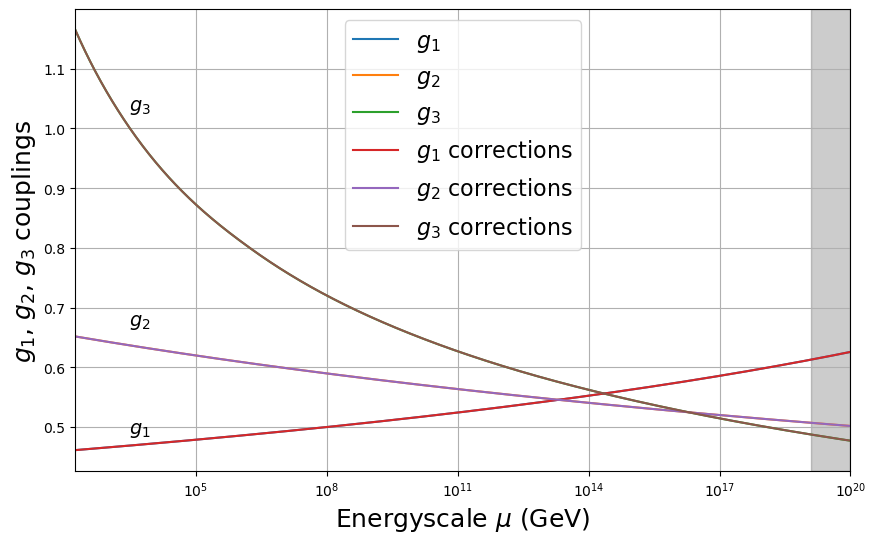

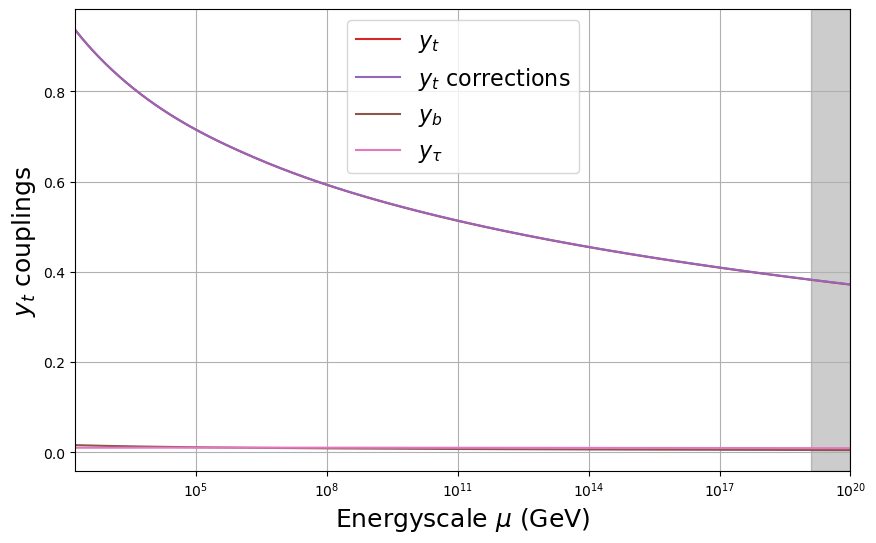

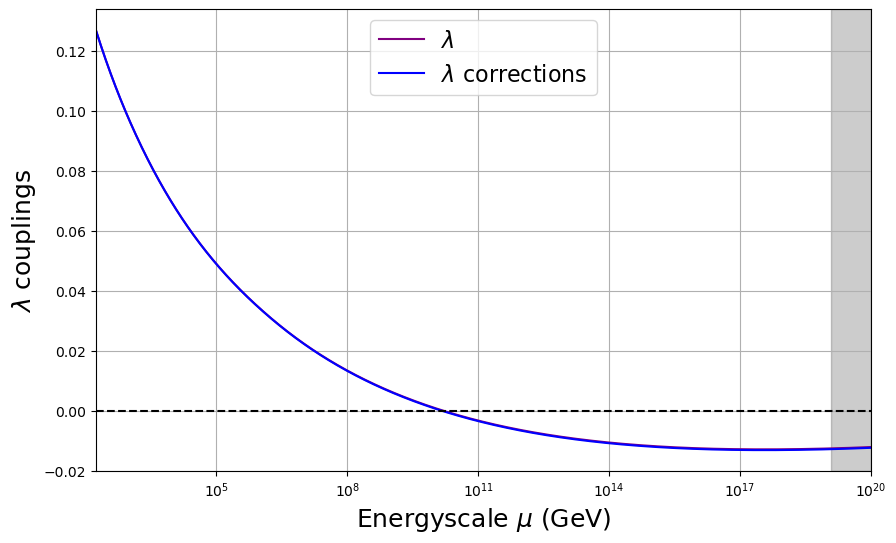

In [16]:
# 2-loop comparison: only yt vs with yb and ytau
# 2-loop g1 g2 g3

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol_3, label=r'$g_1$', color='C0') # g1
plt.plot(mu_vals, g2_sol_3, label=r'$g_2$', color='C1') # g2
plt.plot(mu_vals, g3_sol_3, label=r'$g_3$', color='C2') # g3
plt.plot(mu_vals, g1_sol, label=r'$g_1$ corrections', color='C3') # g1
plt.plot(mu_vals, g2_sol, label=r'$g_2$ corrections', color='C4') # g2
plt.plot(mu_vals, g3_sol, label=r'$g_3$ corrections', color='C5') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# Egyhurok ábrák yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol_3, label=r'$y_t$', color='C3') # yt
plt.plot(mu_vals, yt_sol, label=r'$y_t$ corrections', color='C4') # yt
plt.plot(mu_vals, yb_sol, label=r'$y_b$', color='C5') # yb
plt.plot(mu_vals, ytau_sol, label=r'$y_{\tau}$ ', color='C6') # yb


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$y_t$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# egyhurok ábra lambda
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol_3, label=r'$\lambda$', color='purple') 
plt.plot(mu_vals, lam_sol, label=r'$\lambda$ corrections', color='blue') 


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ couplings", fontsize=18)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

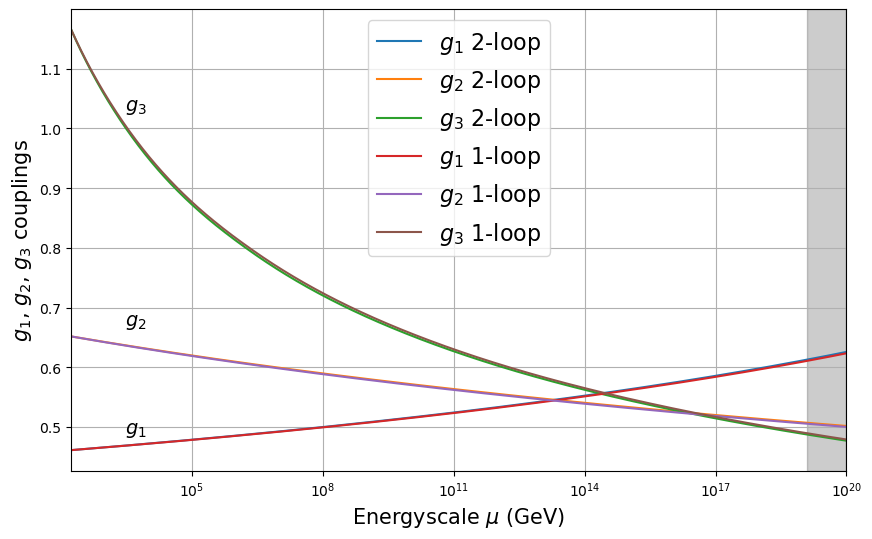

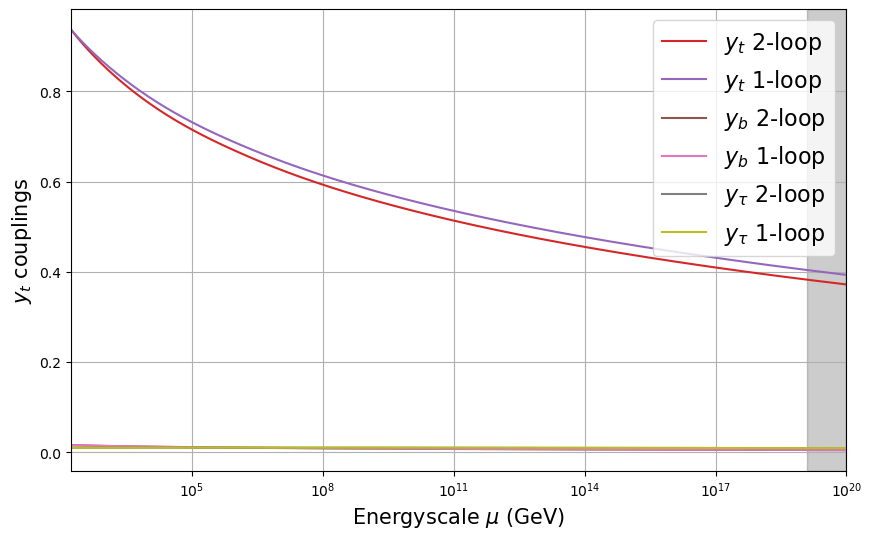

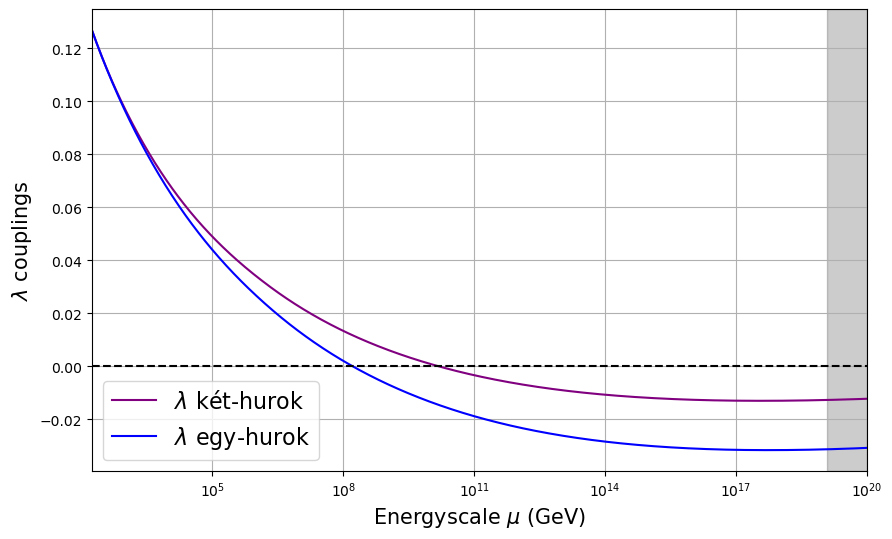

In [17]:
# 1-loop vs 2-loop with yb and ytau
# 1-loop g1 g2 g3

plt.figure(figsize=(10,6))
plt.plot(mu_vals, g1_sol, label=r'$g_1$ 2-loop', color='C0') # g1
plt.plot(mu_vals, g2_sol, label=r'$g_2$ 2-loop', color='C1') # g2
plt.plot(mu_vals, g3_sol, label=r'$g_3$ 2-loop', color='C2') # g3
plt.plot(mu_vals, g1_sol_1, label=r'$g_1$ 1-loop', color='C3') # g1
plt.plot(mu_vals, g2_sol_1, label=r'$g_2$ 1-loop', color='C4') # g2
plt.plot(mu_vals, g3_sol_1, label=r'$g_3$ 1-loop', color='C5') # g3

plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=15)
plt.ylabel(r"$g_1$, $g_2$, $g_3$ couplings", fontsize=15)
plt.legend(loc='best', fontsize='16')

plt.annotate(r'$g_1$', 
             xy=(10e2,0.49), 
             xytext=(15, 0),         # offset in points
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_2$', 
             xy=(10e2,0.67), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )

plt.annotate(r'$g_3$', 
             xy=(10e2, 1.03), 
             xytext=(15, 0),
             textcoords='offset points',
             color='black',
             fontsize=14
             )


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 1-loop plots yt

plt.figure(figsize=(10,6))
plt.plot(mu_vals, yt_sol, label=r'$y_t$ 2-loop', color='C3') # yt
plt.plot(mu_vals, yt_sol_1, label=r'$y_t$ 1-loop', color='C4') # yt
plt.plot(mu_vals, yb_sol, label=r'$y_b$ 2-loop', color='C5') # yb
plt.plot(mu_vals, yb_sol_1, label=r'$y_b$ 1-loop', color='C6') # yb
plt.plot(mu_vals, ytau_sol, label=r'$y_{\tau}$ 2-loop', color='C7') # yb
plt.plot(mu_vals, ytau_sol_1, label=r'$y_{\tau}$ 1-loop ', color='C8') # yb


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=15)
plt.ylabel(r"$y_t$ couplings", fontsize=15)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.show()

# 1-loop plots lambda
plt.figure(figsize=(10,6))
plt.plot(mu_vals, lam_sol, label=r'$\lambda$ két-hurok', color='purple') 
plt.plot(mu_vals, lam_sol_1, label=r'$\lambda$ egy-hurok', color='blue') 


plt.xscale('log')

plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=15)
plt.ylabel(r"$\lambda$ couplings", fontsize=15)
plt.legend(loc='best', fontsize='16')


plt.xlim(mu_vals[0], 1e20)
plt.grid(True)
plt.axvspan(1.22 * 1e19, 1e20, color='black', alpha=0.2) # Planck scale
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

5.) Full lambda function with errors

In [18]:
# Define energy scale
mu_min = np.log(mu_min)
t_max = np.log(mu_max)
t_vals = np.linspace(t_min, t_max, 1000)

# Central values
g1_initial_central = g1_initial
g2_initial_central = g2_initial
g3_initial_central = 1.1645 + 0.0031*((alpha_S - 0.1184)/0.0007) - 0.00046*(M_t - 173.15)
y_t_initial_central = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S - 0.1184)/0.0007)
lambda_initial_central = 0.12577 + 0.00205*(M_h - 125) - 0.00004*(M_t - 173.15)

# Initial conds
y_central = [g1_initial_central, g2_initial_central, g3_initial_central,
             y_t_initial_central, y_b_initial, y_tau_initial, lambda_initial_central]

# Solve
sol_central = solve_ivp(beta1, [t_min, t_max], y_central, dense_output=True, method='RK45')
y_sol_central = sol_central.sol(t_vals)
lam_sol_central = y_sol_central[-1]

In [19]:
# 3sigma only in alpha_S
alpha_S_3up   = alpha_S + 3 * delta_alpha_S
alpha_S_3down = alpha_S - 3 * delta_alpha_S

# Upper, lower values at 3 sigma
g3_initial_alpha_up = 1.1645 + 0.0031*((alpha_S_3up - 0.1184)/0.0007) - 0.00046*(M_t - 173.15)
y_t_initial_alpha_up = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S_3up - 0.1184)/0.0007)
lambda_initial_alpha_up = lambda_initial_central  

g3_initial_alpha_down = 1.1645 + 0.0031*((alpha_S_3down - 0.1184)/0.0007) - 0.00046*(M_t - 173.15)
y_t_initial_alpha_down = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S_3down - 0.1184)/0.0007)
lambda_initial_alpha_down = lambda_initial_central

# Initial conds
y_alpha_up   = [g1_initial, g2_initial, g3_initial_alpha_up,
                y_t_initial_alpha_up, y_b_initial, y_tau_initial, lambda_initial_alpha_up]
y_alpha_down = [g1_initial, g2_initial, g3_initial_alpha_down,
                y_t_initial_alpha_down, y_b_initial, y_tau_initial, lambda_initial_alpha_down]

# Solve
sol_alpha_up = solve_ivp(beta1, [t_min, t_max], y_alpha_up, dense_output=True, method='RK45')
sol_alpha_down = solve_ivp(beta1, [t_min, t_max], y_alpha_down, dense_output=True, method='RK45')

lam_sol_alpha_up = sol_alpha_up.sol(t_vals)[-1]
lam_sol_alpha_down = sol_alpha_down.sol(t_vals)[-1]

In [20]:
# 3 sigma variation in M_t
M_t_3up   = M_t + 3 * delta_M_t
M_t_3down = M_t - 3 * delta_M_t

# Upper ,lower values at 3 sigma
g3_initial_Mt_up = 1.1645 + 0.0031*((alpha_S - 0.1184)/0.0007) - 0.00046*(M_t_3up - 173.15)
y_t_initial_Mt_up = 0.93587 + 0.00557*(M_t_3up - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S - 0.1184)/0.0007)
# Here we follow your convention: for the “upper” lambda branch we use M_t lowered in lambda:
# The variation of delta_lambda is unclear, that why its in comment
lambda_initial_Mt_up = 0.12577 + 0.00205*(M_h - 125) - 0.00004*(M_t_3down - 173.15)  # + 3 * delta_lambda_initial

g3_initial_Mt_down = 1.1645 + 0.0031*((alpha_S - 0.1184)/0.0007) - 0.00046*(M_t_3down - 173.15)
y_t_initial_Mt_down = 0.93587 + 0.00557*(M_t_3down - 173.15) - 0.00003*(M_h - 125) - 0.00041*((alpha_S - 0.1184)/0.0007)
lambda_initial_Mt_down = 0.12577 + 0.00205*(M_h - 125) - 0.00004*(M_t_3up - 173.15) # - 3 * delta_lambda_initial

# Initial conds
y_Mt_up   = [g1_initial, g2_initial, g3_initial_Mt_up,
             y_t_initial_Mt_up, y_b_initial, y_tau_initial, lambda_initial_Mt_up]
y_Mt_down = [g1_initial, g2_initial, g3_initial_Mt_down,
             y_t_initial_Mt_down, y_b_initial, y_tau_initial, lambda_initial_Mt_down]

# Solve
sol_Mt_up = solve_ivp(beta1, [t_min, t_max], y_Mt_up, dense_output=True, method='RK45')
sol_Mt_down = solve_ivp(beta1, [t_min, t_max], y_Mt_down, dense_output=True, method='RK45')

lam_sol_Mt_up = sol_Mt_up.sol(t_vals)[-1]
lam_sol_Mt_down = sol_Mt_down.sol(t_vals)[-1]

In [21]:
# 3 sigma variation in M_h
M_h_3up   = M_h + 3 * delta_M_h
M_h_3down = M_h - 3 * delta_M_h

# upper, lower bands
g3_initial_Mh = 1.1645 + 0.0031*((alpha_S - 0.1184)/0.0007) - 0.00046*(M_t - 173.15)  # no M_h-dependence here

y_t_initial_Mh_up = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h_3down - 125) - 0.00041*((alpha_S - 0.1184)/0.0007)
lambda_initial_Mh_up = 0.12577 + 0.00205*(M_h_3up - 125) - 0.00004*(M_t - 173.15) # + 3 * delta_lambda_initial

y_t_initial_Mh_down = 0.93587 + 0.00557*(M_t - 173.15) - 0.00003*(M_h_3up - 125) - 0.00041*((alpha_S - 0.1184)/0.0007)
lambda_initial_Mh_down = 0.12577 + 0.00205*(M_h_3down - 125) - 0.00004*(M_t - 173.15) # - 3 * delta_lambda_initial

# Initial conds
y_Mh_up   = [g1_initial, g2_initial, g3_initial_Mh,
             y_t_initial_Mh_up, y_b_initial, y_tau_initial, lambda_initial_Mh_up]
y_Mh_down = [g1_initial, g2_initial, g3_initial_Mh,
             y_t_initial_Mh_down, y_b_initial, y_tau_initial, lambda_initial_Mh_down]

# Solve
sol_Mh_up = solve_ivp(beta1, [t_min, t_max], y_Mh_up, dense_output=True, method='RK45')
sol_Mh_down = solve_ivp(beta1, [t_min, t_max], y_Mh_down, dense_output=True, method='RK45')

lam_sol_Mh_up = sol_Mh_up.sol(t_vals)[-1]
lam_sol_Mh_down = sol_Mh_down.sol(t_vals)[-1]

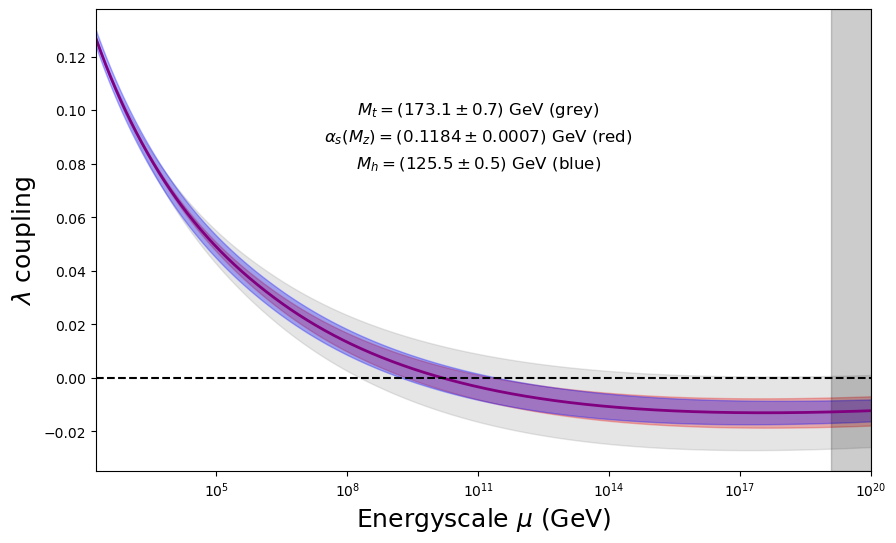

In [22]:
mu_vals = np.exp(t_vals) * M_Z
plt.figure(figsize=(10, 6))
plt.plot(mu_vals, lam_sol_central, color='purple', linewidth=2, label=r'Central $\lambda$ (2-loop)')


plt.fill_between(mu_vals, lam_sol_alpha_down, lam_sol_alpha_up, 
                 color='red', alpha=0.3, label=r'3$\sigma$ from $\alpha_S$')

plt.fill_between(mu_vals, lam_sol_Mt_down, lam_sol_Mt_up, 
                 color='grey', alpha=0.2, label=r'3$\sigma$ from $M_t$')

plt.fill_between(mu_vals, lam_sol_Mh_down, lam_sol_Mh_up, 
                 color='blue', alpha=0.3, label=r'3$\sigma$ from $M_h$')


plt.xscale('log')
plt.xlabel(r"Energyscale $\mu$ (GeV)", fontsize=18)
plt.ylabel(r"$\lambda$ coupling", fontsize=18)

plt.text(10e10, 0.1, r'$M_t = (173.1 \pm 0.7)$ GeV (grey)', fontsize=12, color='black', ha='center', va='center')  
plt.text(10e10, 0.09, r'$\alpha_s (M_z) = (0.1184 \pm 0.0007)$ GeV (red)', fontsize=12, color='black', ha='center', va='center') 
plt.text(10e10, 0.08, r'$M_h = (125.5 \pm 0.5)$ GeV (blue)', fontsize=12, color='black', ha='center', va='center')  
plt.grid(False)
plt.xlim(mu_vals[0], 1e20)
plt.axvspan(1.22e19, 1e20, color='black', alpha=0.2, label="Planck scale")
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)
plt.show()

6.) contour plots: Mt vs Mh and g1 vs g2

In [23]:

#Solves beta functions without yb ytau

def solve_lambda_vs_scale_new(M_h, M_t, t_eval_points=300):
   
    # Use global constants from the main code: alpha_EM, alpha_S, sin2_theta, M_Z, etc.
    sin_theta = np.sqrt(sin2_theta)
    cos_theta = np.sqrt(1.0 - sin2_theta)

    # Initial conditions for the reduced system: [g1, g2, g3, y_t, lambda]
    g1_initial = np.sqrt(5/3) * np.sqrt(4*np.pi*alpha_EM) / cos_theta
    g2_initial = np.sqrt(4*np.pi*alpha_EM) / sin_theta
    g3_initial = 1.1645 + 0.0031 * ((alpha_S - 0.1184)/0.0007) - 0.00046 * (M_t - 173.15)
    y_t_initial = (0.93587 + 0.00557 * (M_t - 173.15)
                         - 0.00003 * (M_h - 125)
                         - 0.00041 * ((alpha_S - 0.1184)/0.0007))
    lam_initial = (0.12577 + 0.00205 * (M_h - 125) - 0.00004 * (M_t - 173.15))
    
    y0 = [g1_initial, g2_initial, g3_initial, y_t_initial, lam_initial]

    # Define energy scale: from mu_min (set to max(M_t,1 GeV) to avoid too low scales)
    mu_min = max(M_t, 1.0)
    t_min = np.log(mu_min / M_Z)
    t_max = np.log(1e20 / M_Z)
    
    # Solve the RGEs using the 2-loop beta function (beta3) with a stiff solver.
    sol = solve_ivp(
        beta3,
        [t_min, t_max],
        y0,
        dense_output=True,
        method='Radau'
    )

    # Evaluate the solution on a set of points
    t_vals = np.linspace(t_min, t_max, t_eval_points)
    y_sol = sol.sol(t_vals)
    lam_vals = y_sol[4]  # Index 4 corresponds to lambda

    # Convert t back to the physical energy scale
    mu_vals = np.exp(t_vals) * M_Z

    return mu_vals, lam_vals


In [24]:

import concurrent.futures

def evaluate_stability(params):
    
    M_h_test, M_t_test, i, j = params
    # Skip unphysical top masses
    if M_t_test <= 1.0:
        return ((i, j), 0)
    
    # Solve for lambda evolution for this (M_h, M_t)
    mu_vals, lam_vals = solve_lambda_vs_scale_new(M_h_test, M_t_test, t_eval_points=300)
    
    # Apply stability criteria:
    #   - If lambda becomes negative (instability)
    #   - If lambda exceeds 1 (non-perturbative region)
    if np.any(lam_vals < 0) or np.any(lam_vals > 1):
        return ((i, j), 0)
    else:
        return ((i, j), 1)

# Increase grid resolution, e.g., 100x100 or higher.
N = 50  # Adjust as needed for higher resolution
M_h_values = np.linspace(0, 200, N)
M_t_values = np.linspace(0, 200, N)

# Prepare a list of parameters for each grid point
params_list = []
for i, M_h_test in enumerate(M_h_values):
    for j, M_t_test in enumerate(M_t_values):
        params_list.append((M_h_test, M_t_test, i, j))

# Create an empty stability map
stability_map = np.zeros((N, N), dtype=int)

# Use ProcessPoolExecutor for parallel processing.
with concurrent.futures.ProcessPoolExecutor() as executor:
    # Map the evaluate_stability function over all grid points
    for result in executor.map(evaluate_stability, params_list):
        (i, j), flag = result
        stability_map[i, j] = flag


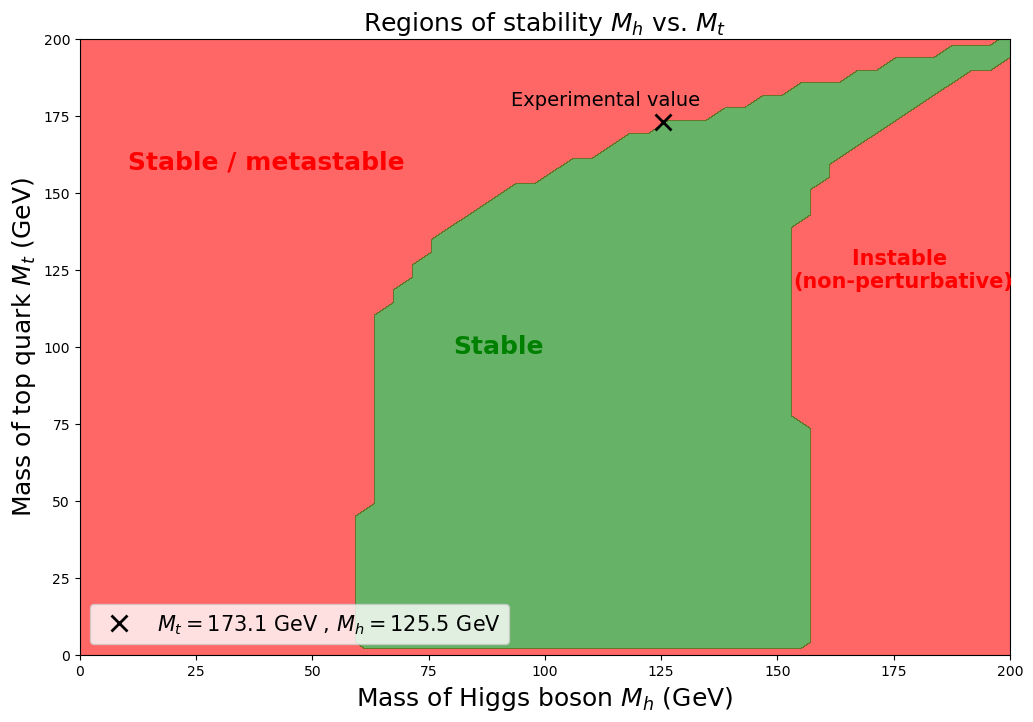

In [30]:

# Now plot the result as before:
MH_grid, MT_grid = np.meshgrid(M_h_values, M_t_values, indexing='ij')
plt.figure(figsize=(12, 8))
plt.contourf(
    MH_grid, MT_grid, stability_map,
    levels=[-0.5, 0.5, 1.5],
    colors=['red', 'green'],
    alpha=0.6
)
plt.xlabel('Mass of Higgs boson $M_h$ (GeV)', fontsize=18)
plt.ylabel('Mass of top quark $M_t$ (GeV)', fontsize=18)
plt.title('Regions of stability $M_h$ vs. $M_t$ ', fontsize=18)
plt.plot([125.5], [173.1], 'kx', ms=12, mew=2, label=r"$M_t = 173.1$ GeV , $M_h = 125.5$ GeV")
plt.legend(loc='lower left', fontsize=15)
plt.text(40, 160, 'Stable / metastable', fontsize=18, color='red', ha='center', va='center', weight='bold')  
plt.text(90, 100, 'Stable', fontsize=18, color='green', ha='center', va='center', weight='bold')  
plt.text(177, 125, 'Instable \n(non-perturbative)', fontsize=15, color='red', ha='center', va='center', weight='bold')  
plt.text(113, 180, 'Experimental value', fontsize=14, color='black', ha='center', va='center')
plt.show()

plt.show()


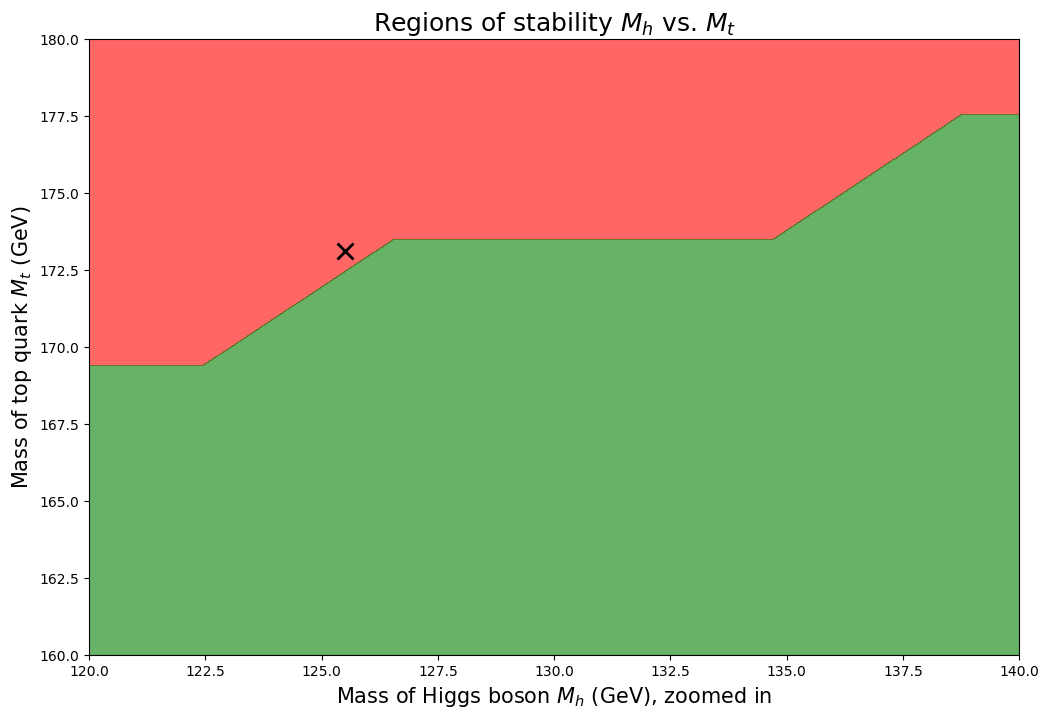

In [32]:

# Now plot the result as before:
MH_grid, MT_grid = np.meshgrid(M_h_values, M_t_values, indexing='ij')
plt.figure(figsize=(12, 8))
plt.contourf(
    MH_grid, MT_grid, stability_map,
    levels=[-0.5, 0.5, 1.5],
    colors=['red', 'green'],
    alpha=0.6
)
plt.xlabel('Mass of Higgs boson $M_h$ (GeV), zoomed in', fontsize=15)
plt.ylabel('Mass of top quark $M_t$ (GeV)', fontsize=15)
plt.title('Regions of stability $M_h$ vs. $M_t$', fontsize=18)
plt.plot([125.5], [173.1], 'kx', ms=12, mew=2, label=r"$M_t = 173.1$ GeV , $M_h = 125.5 GeV$")

plt.xlim(120, 140)
plt.ylim(160, 180)
plt.show()

plt.show()


In [27]:
# g1 vs g2
# Define a new function that solves the RGEs with fixed M_h and M_t
# but with arbitrary initial conditions for g1 and g2.
def solve_lambda_vs_scale_g1g2(g1_init, g2_init, M_h_fixed=125.5, M_t_fixed=173.1, t_eval_points=300):
    # Use the same formulas for the other initial conditions as before.
    # (g3, y_t, and lambda are computed from fixed M_h and M_t.)
    g3_initial = 1.1645 + 0.0031 * ((alpha_S - 0.1184) / 0.0007) - 0.00046 * (M_t_fixed - 173.15)
    y_t_initial = (0.93587 + 0.00557 * (M_t_fixed - 173.15)
                   - 0.00003 * (M_h_fixed - 125)
                   - 0.00041 * ((alpha_S - 0.1184) / 0.0007))
    lam_initial = (0.12577 + 0.00205 * (M_h_fixed - 125) - 0.00004 * (M_t_fixed - 173.15))
    # Pack the initial conditions (with g1 and g2 now as function arguments)
    y0 = [g1_init, g2_init, g3_initial, y_t_initial, lam_initial]
    
    # Define the energy scale (using the same convention as in your function)
    mu_min = max(M_t_fixed, 1.0)
    t_min = np.log(mu_min / M_Z)
    t_max = np.log(1e20 / M_Z)
    
    # Solve the RGEs using the 2-loop beta functions (beta3)
    sol = solve_ivp(beta3, [t_min, t_max], y0, dense_output=True, method='Radau')
    t_vals = np.linspace(t_min, t_max, t_eval_points)
    y_sol = sol.sol(t_vals)
    lam_vals = y_sol[4]  # Index 4 corresponds to lambda
    mu_vals = np.exp(t_vals) * M_Z  # Convert back to the physical energy scale
    return mu_vals, lam_vals

# Define a function that evaluates stability for a given pair (g1, g2)
def evaluate_stability_g1g2(params):
    g1_val, g2_val, i, j = params
    # Solve for the lambda evolution with these initial g1 and g2 values,
    # keeping M_h and M_t fixed at their physical values.
    mu_vals, lam_vals = solve_lambda_vs_scale_g1g2(g1_val, g2_val, M_h_fixed=125.5, M_t_fixed=173.1, t_eval_points=300)
    # Apply the same stability criteria: if lambda ever becomes negative or > 1,
    # mark as unstable/nonperturbative (flag = 0), otherwise stable (flag = 1).
    if np.any(lam_vals < 0) or np.any(lam_vals > 1):
        return ((i, j), 0)
    else:
        return ((i, j), 1)

# Define a grid for g1 and g2 (from 0 to 10 GeV)
N_g = 50  # Grid resolution 
g1_values = np.linspace(0, 2, N_g)
g2_values = np.linspace(0, 2, N_g)

# Prepare a list of parameters for each grid point
params_list_g = []
for i, g1_val in enumerate(g1_values):
    for j, g2_val in enumerate(g2_values):
        params_list_g.append((g1_val, g2_val, i, j))

# Create an empty stability map for g1 vs. g2
stability_map_g = np.zeros((N_g, N_g), dtype=int)

# Use parallel processing (ProcessPoolExecutor) to evaluate each grid point
import concurrent.futures
with concurrent.futures.ProcessPoolExecutor() as executor:
    for result in executor.map(evaluate_stability_g1g2, params_list_g):
        (i, j), flag = result
        stability_map_g[i, j] = flag




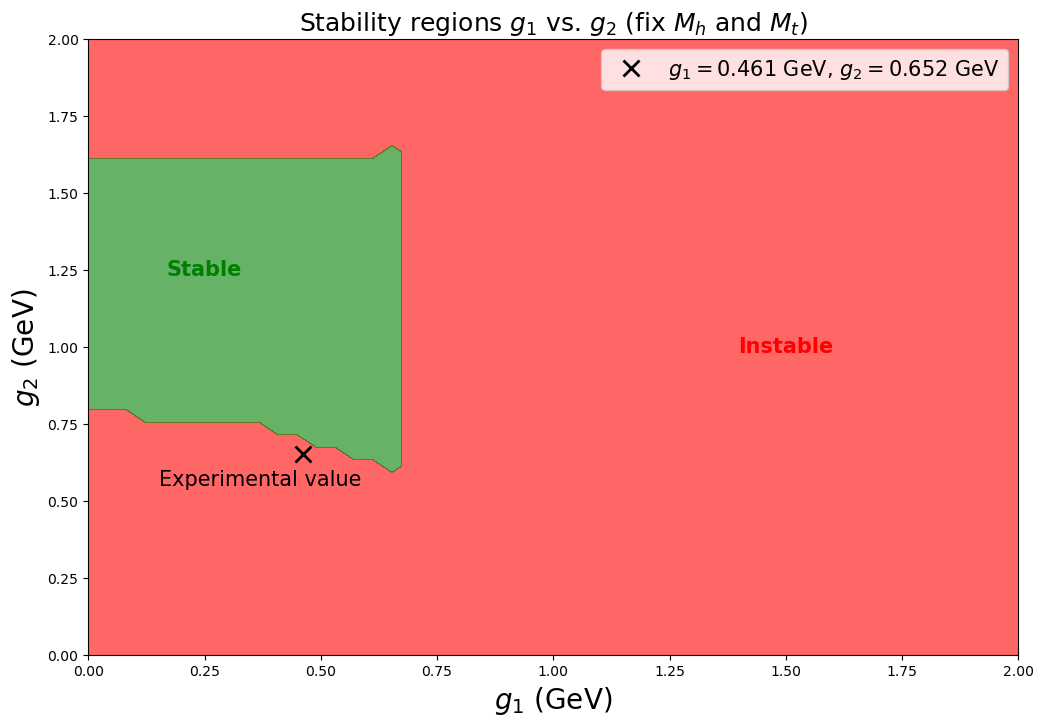

In [33]:

# Create a contour plot of the stability map.
# x-axis: g1 initial values, y-axis: g2 initial values.
G1_grid, G2_grid = np.meshgrid(g1_values, g2_values, indexing='ij')
plt.figure(figsize=(12, 8))
plt.contourf(
    G1_grid, G2_grid, stability_map_g,
    levels=[-0.5, 0.5, 1.5],
    colors=['red', 'green'],
    alpha=0.6
)
plt.xlabel('$g_1$ (GeV)', fontsize=20)
plt.ylabel('$g_2$ (GeV)', fontsize=20)
plt.title('Stability regions $g_1$ vs. $g_2$ (fix $M_h$ and $M_t$)', fontsize=18)

plt.plot([g1_initial], [g2_initial], 'kx', ms=12, mew=2, label=r"$g_1 = 0.461$ GeV, $g_2 = 0.652$ GeV")
plt.legend(loc='best', fontsize=15)
plt.text(0.37, 0.57, 'Experimental value', fontsize=15, color='black', ha='center', va='center')
plt.text(1.50, 1, 'Instable', fontsize=15, color='red', ha='center', va='center', weight='bold')  
plt.text(0.25, 1.25, 'Stable', fontsize=15, color='green', ha='center', va='center', weight='bold')
plt.show()
